<a href="https://colab.research.google.com/github/natyrix/tensorflow/blob/main/feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [4]:
df = pd.read_csv("./diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


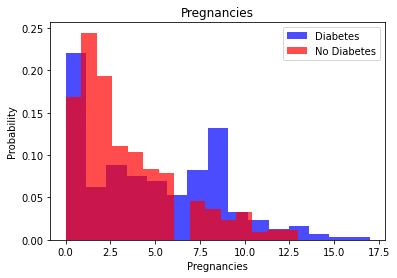

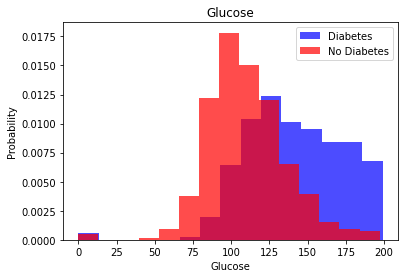

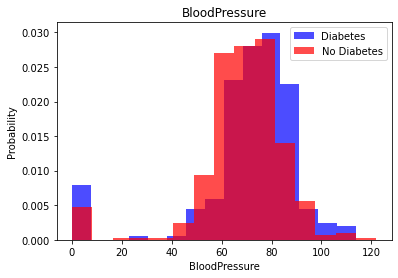

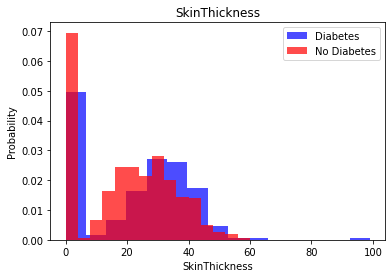

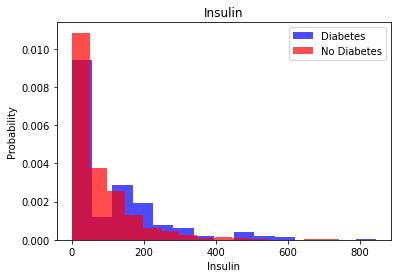

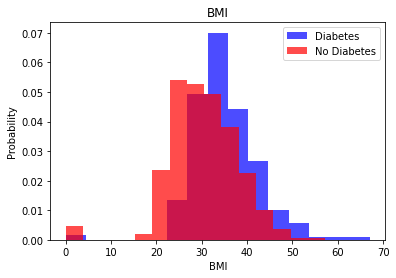

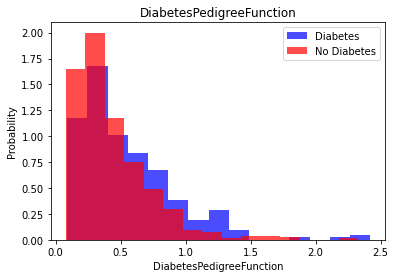

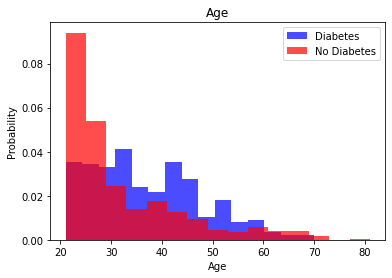

In [14]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color='blue', label="Diabetes", alpha=0.7, density=True, bins=15)
  plt.hist(df[df['Outcome']==0][label], color='red', label="No Diabetes", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [43]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [57]:
X.shape, y.shape

((768, 8), (768,))

In [62]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
tranformed_df = pd.DataFrame(data, columns=df.columns)

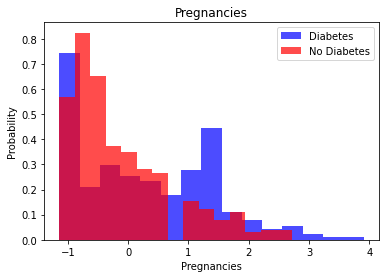

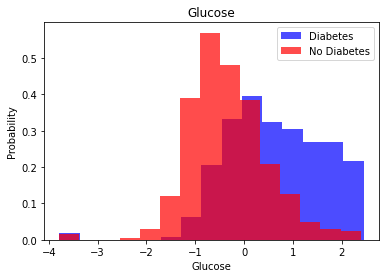

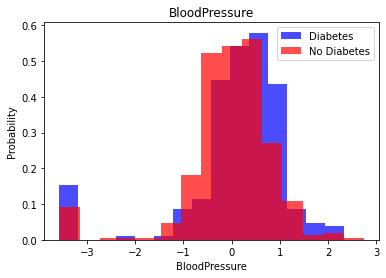

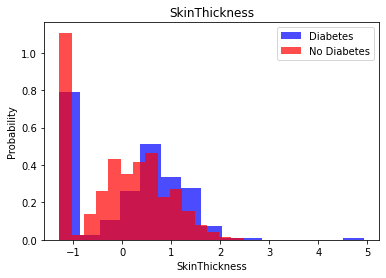

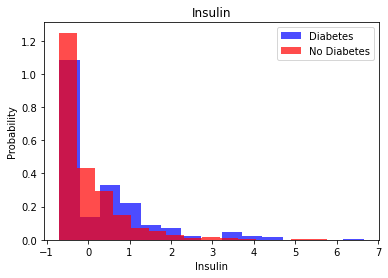

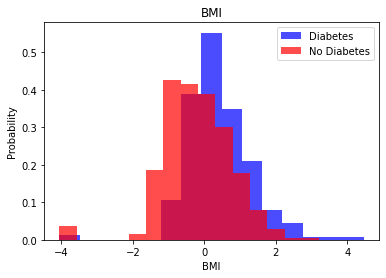

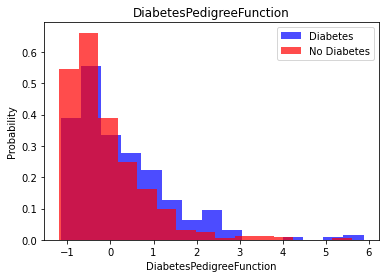

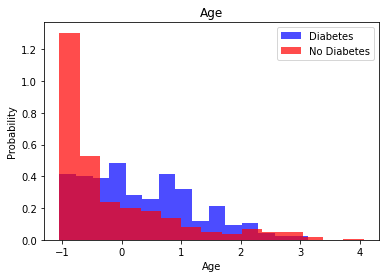

In [63]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(tranformed_df[tranformed_df['Outcome']==1][label], color='blue', label="Diabetes", alpha=0.7, density=True, bins=15)
  plt.hist(tranformed_df[tranformed_df['Outcome']==0][label], color='red', label="No Diabetes", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [65]:
len(tranformed_df[tranformed_df["Outcome"]==1]), len(tranformed_df[tranformed_df["Outcome"]==0])

(268, 500)

In [66]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
tranformed_df = pd.DataFrame(data, columns=df.columns)

In [67]:
len(tranformed_df[tranformed_df["Outcome"]==1]), len(tranformed_df[tranformed_df["Outcome"]==0])


(500, 500)

In [68]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp,y_temp, test_size=0.5, random_state=0)

In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [70]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy']
              )

In [71]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 1ms/step - loss: 0.7110 - accuracy: 0.4967


[0.7110387086868286, 0.49666666984558105]

In [72]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.7072 - accuracy: 0.5150


[0.707161545753479, 0.5149999856948853]

In [73]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.5783 - val_loss: 0.6263 - val_accuracy: 0.7300
Epoch 2/20
38/38 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.6733 - val_loss: 0.5728 - val_accuracy: 0.7450
Epoch 3/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.7017 - val_loss: 0.5345 - val_accuracy: 0.7700
Epoch 4/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5542 - accuracy: 0.7200 - val_loss: 0.5086 - val_accuracy: 0.7700
Epoch 5/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5388 - accuracy: 0.7217 - val_loss: 0.4912 - val_accuracy: 0.7750
Epoch 6/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5278 - accuracy: 0.7250 - val_loss: 0.4810 - val_accuracy: 0.7750
Epoch 7/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5218 - accuracy: 0.7350 - val_loss: 0.4733 - val_accuracy: 0.7650
Epoch 8/20
38/38 [==

In [75]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.7600


[0.48281577229499817, 0.7599999904632568]